In [1]:
import base64
import io
import numpy as np
import PIL.Image


def img_data_to_pil(img_data):
    f = io.BytesIO()
    f.write(img_data)
    img_pil = PIL.Image.open(f)
    return img_pil


def img_data_to_arr(img_data):
    img_pil = img_data_to_pil(img_data)
    img_arr = np.array(img_pil)
    return img_arr


def img_b64_to_arr(img_b64):
    img_data = base64.b64decode(img_b64)
    img_arr = img_data_to_arr(img_data)
    return img_arr


def img_pil_to_data(img_pil):
    f = io.BytesIO()
    img_pil.save(f, format="PNG")
    img_data = f.getvalue()
    return img_data


def img_arr_to_b64(img_arr):
    img_pil = PIL.Image.fromarray(img_arr)
    f = io.BytesIO()
    img_pil.save(f, format="PNG")
    img_bin = f.getvalue()
    if hasattr(base64, "encodebytes"):
        img_b64 = base64.encodebytes(img_bin)
    else:
        img_b64 = base64.encodestring(img_bin)
    return img_b64

In [ ]:
# in terminal

# apt-get udate
# apt-get install -y python3-opencv

In [2]:
%cd /home/PycharmProjects/tensorrt

import json
import os
import os.path as osp

#def create_sub_dir(proj_dir, sub_dir_name):
#    sub_dir_path = osp.join(proj_dir, sub_dir_name)
#    if not osp.isdir(sub_dir_path):
#        os.makedirs(sub_dir_path)

proj_name = 'trunk3'

src_dir = osp.join(proj_name, 'src')
images_dir = osp.join(proj_name, f'images/{proj_name}')
labels_dir = osp.join(proj_name, f'labels/{proj_name}')
data_dir = osp.join(proj_name, 'data')

for fold in ([src_dir, 
              images_dir, 
              labels_dir, 
              data_dir]):
    if not osp.isdir(fold):
        os.makedirs(fold)


/home/PycharmProjects/tensorrt


In [3]:
# zip file with labelme jsons to "src" folder and run 
%cd /home/PycharmProjects/tensorrt/{proj_name}/src
!unzip -q data.zip

/home/PycharmProjects/tensorrt/trunk3/src


In [4]:
%cd /home/PycharmProjects/tensorrt

import cv2
import numpy as np

# populate list with labels to include for training
labels = ['trunk']

#src_dir = osp.join(proj_name, 'src')
#images_dir = osp.join(proj_name, f'images/{proj_name}')
#labels_dir = osp.join(proj_name, f'labels/{proj_name}')
#data_dir = osp.join(proj_name, 'data')

for file_name in os.listdir(src_dir):
    if file_name.endswith('.json'):
        name = file_name.split('.')[0]
        path = osp.join(src_dir, file_name)
        with open(path,'r') as f:
            ann = json.load(f)

        # save image
        img  = img_b64_to_arr(ann['imageData']).astype(np.uint8)
        img_name = name + '.bmp'
        dst_img_path = osp.join(images_dir, img_name)
        cv2.imwrite(dst_img_path, img)
        
        # save labels
        img_w = ann['imageWidth']
        img_h = ann['imageHeight']
        
        yolo_ann = ''
        for shape in ann['shapes']:
            label = shape['label']
            if label not in labels:
                continue
            print(label)  
            l_id = labels.index(label)
            pts = shape['points']
            pts = np.asarray(pts)
            xmin, ymin = np.min(pts, axis=0).tolist()
            xmax, ymax = np.max(pts, axis=0).tolist()
            w, h = xmax - xmin, ymax - ymin
            yolo_ann += f'{l_id} {(xmin+xmax)/2/img_w:.6f} {(ymin+ymax)/2/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}\n'
        
        label_name = name + '.txt'
        label_path = osp.join(labels_dir, label_name)
        with open(label_path, 'w') as f:
            print(yolo_ann)
            f.write(yolo_ann)


/home/PycharmProjects/tensorrt
trunk
0 0.445435 0.518039 0.120708 0.260417

trunk
0 0.432582 0.646012 0.070413 0.109531

trunk
0 0.454377 0.514127 0.122943 0.259299

trunk
0 0.428112 0.579511 0.086060 0.186651

trunk
0 0.444318 0.487862 0.114002 0.300653

trunk
0 0.360493 0.632041 0.084943 0.077119

trunk
0 0.419170 0.633718 0.077119 0.136356

trunk
0 0.409670 0.675072 0.089413 0.058119

trunk
0 0.382846 0.554363 0.087178 0.228004

trunk
0 0.423082 0.590129 0.080472 0.160944

trunk
0 0.458289 0.481156 0.126296 0.323006

trunk
0 0.406876 0.675630 0.068178 0.054766

trunk
0 0.442641 0.624776 0.086060 0.152003

trunk
0 0.442641 0.563864 0.115120 0.262652

trunk
0 0.437053 0.553805 0.095002 0.211239

trunk
0 0.472818 0.458244 0.177709 0.388948

trunk
0 0.470583 0.472774 0.157591 0.344242

trunk
0 0.432023 0.635953 0.078237 0.125179

trunk
0 0.426435 0.586776 0.078237 0.154238

trunk
0 0.414700 0.511333 0.097237 0.233593

trunk
0 0.420288 0.582305 0.081590 0.156474

trunk
0 0.436494 0.60074

# sanity check

trunk3/labels/trunk3/839783.txt
['0 0.442641 0.563864 0.115120 0.262652']
0 73 83 96 133


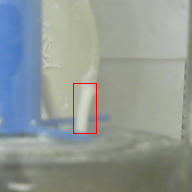

In [6]:
import numpy as np
import cv2
import PIL.Image

imgs = os.listdir(images_dir)
img_id = np.random.randint(len(imgs))
img_name = imgs[img_id]
img_path = osp.join(images_dir, img_name)
img = cv2.imread(img_path)

img_h, img_w = img.shape[:2]

ann_name = img_name.split('.')[0] + '.txt'
ann_path = osp.join(labels_dir, ann_name)

with open(ann_path, 'r') as f:
    anns = f.read().split('\n')[:-1]
    print(ann_path)
    print(anns)
    

for ann in anns:
    lid, x, y, w, h = ann.split()
    xmin = int((float(x)-float(w)/2) * img_w)
    ymin = int((float(y)-float(h)/2) * img_h)
    xmax = int((float(x)+float(w)/2) * img_w)
    ymax = int((float(y)+float(h)/2) * img_h)
    print(lid, xmin, ymin, xmax, ymax)
    cv2.rectangle(img, (xmin, ymin
                       ), (xmax, ymax), (255,0,0), 1)

PIL.Image.fromarray(img)

In [7]:
# create data file like
#classes=3
#train=../trunk/images/trunk
#valid=../trunk/images/trunk
#names=/home/PycharmProjects/tensorrt/yolov3_arch/data/wings.names

%cd /home/PycharmProjects/tensorrt
import os.path as osp

names = '\n'.join(labels)
name_names = f'{proj_name}' + '.names'
path_to_names = osp.join(data_dir, name_names)
with open(path_to_names, 'w') as f:
    f.write(names)

data = f'classes={len(labels)}\n'
data += f'train={os.path.abspath(images_dir)}\n'
data += f'valid={os.path.abspath(images_dir)}\n'
data += f'names={os.path.abspath(path_to_names)}'

data_name = f'{proj_name}' + '.data'
path_to_data = osp.join(data_dir, data_name)
with open(path_to_data, 'w') as f:
    f.write(data)

/home/PycharmProjects/tensorrt


# train

https://github.com/ultralytics/yolov3/wiki/Train-Custom-Data

In [ ]:
#!python -m pip install -r /home/PycharmProjects/tensorrt/yolov3_arch/requirements.txt
#!python -m pip install torch
#!python -m pip install tensorboard
#!python -m pip install matplotlib 

In [8]:
%cd /home/PycharmProjects/tensorrt/yolov3_arch

#import warnings

#warnings.filterwarnings("ignore")

!python3 train.py \
--cfg cfg/yolov3-1cls.cfg \
--data /home/PycharmProjects/tensorrt/{data_dir}/{proj_name}.data \
--weights weights/yolov3.pt \
--img 192 \
--batch 8

/home/PycharmProjects/tensorrt/yolov3_arch
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='cfg/yolov3-1cls.cfg', data='/home/PycharmProjects/tensorrt/trunk3/data/trunk3.data', device='', epochs=300, evolve=False, freeze_layers=False, img_size=[192], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-32GB', total_memory=32510MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 222 layers, 6.15237e+07 parameters, 6.15237e+07 gradients
Optimizer groups: 75 .bias, 75 Conv2d.weight, 72 other
Reading image shapes: 100%|██████████████████| 61/61 [00:00<00:00, 12272.28it/s]
Caching labels /home/PycharmProjects/tensorrt/trunk3/labels/trunk3 (61 found, 0 
Caching labels /home/PycharmProjects/tensorrt/

# test

In [9]:
%cd /home/PycharmProjects/tensorrt/yolov3_arch

!python3 detect.py \
--cfg cfg/yolov3-1cls.cfg \
--names /home/PycharmProjects/tensorrt/{data_dir}/{proj_name}.names \
--weights weights/best.pt \
--source /home/PycharmProjects/tensorrt/{images_dir} \
--output output \
--img-size 192 \
--conf-thres 0.05

/home/PycharmProjects/tensorrt/yolov3_arch
Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-1cls.cfg', classes=None, conf_thres=0.05, device='', fourcc='mp4v', half=False, img_size=192, iou_thres=0.6, names='/home/PycharmProjects/tensorrt/trunk3/data/trunk3.names', output='output', save_txt=False, source='/home/PycharmProjects/tensorrt/trunk3/images/trunk3', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-32GB', total_memory=32510MB)

Model Summary: 222 layers, 6.15237e+07 parameters, 6.15237e+07 gradients
image 1/61 /home/PycharmProjects/tensorrt/trunk3/images/trunk3/10936.bmp: 192x192 1 trunks, Done. (0.0066s)
image 2/61 /home/PycharmProjects/tensorrt/trunk3/images/trunk3/112598.bmp: 192x192 1 trunks, Done. (0.0066s)
image 3/61 /home/PycharmProjects/tensorrt/trunk3/images/trunk3/116782.bmp: 192x192 1 trunks, Done. (0.0065s)
image 4/61 /home/PycharmProjects/tensorrt/trunk3/images/trunk3/130825.bmp: 192x192 1 trunks,

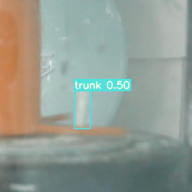

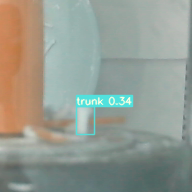

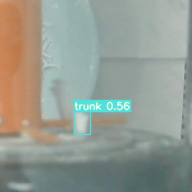

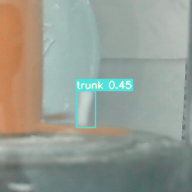

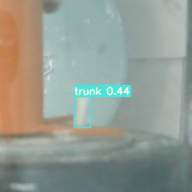

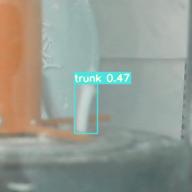

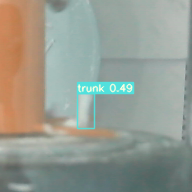

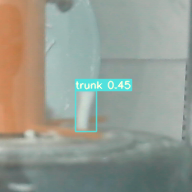

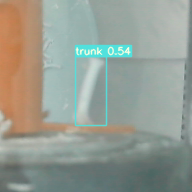

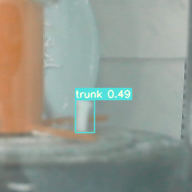

In [10]:
import PIL.Image

res_dir = '/home/PycharmProjects/tensorrt/yolov3_arch/output'
for file_name in os.listdir(res_dir)[:10]:
    if file_name.endswith(('bmp', 'jpg', 'png')):
        path = osp.join(res_dir, file_name)
        display(PIL.Image.open(path))

In [11]:
from models import convert

convert('cfg/yolov3-1cls.cfg', 'weights/best.pt')

Model Summary: 222 layers, 6.15237e+07 parameters, 6.15237e+07 gradients
Success: converted 'weights/best.pt' to 'weights/best.weights'
